# Práctica 3: _Travelling Salesman_

Trataremos de resolver el [Problema del Viajante (de Comercio)](https://en.wikipedia.org/wiki/Travelling_salesman_problem)

Es un problema [NP Duro](https://en.wikipedia.org/wiki/NP-hardness)

* [Vídeo explicación de P vs. NP](https://www.youtube.com/watch?v=UR2oDYZ-Sao)

## Problema

> Dada una lista de ciudades y las distancias entre cada par de ellas, ¿cuál es la ruta más corta posible que visita cada ciudad exactamente una vez y al finalizar regresa a la ciudad origen?

* Varias formulaciones
    * Miller, Tucker y Zemlin
    * Dantzig, Fulkerson y Johnson
* Métodos heurísticos
    * Colonia de hormigas
    * __Algoritmos Genéticos__

[Comparación de métodos](https://baobabsoluciones.es/blog/2020/10/01/problema-del-viajante/)

## Algoritmo Genético

Hallar una ruta tal que cumpla las

* Condiciones
    1. Cada ciudad debe ser visitada únicamente una vez
    2. Debemos terminar la ruta en la ciudad inicial

* Gen: ciudad, coordenadas $(x,y)$
* _Individuo_ (cromosoma): __ruta__ que satisface las condiciones
* Población: conjunto de rutas/individuos
* _Fitness_: función que da la _bondad_ de una ruta (distancia total recorrida)
* __Mutación y entrecruzamiento:__ cómo introducimos variación en la población

### Pasos

1. Crear una población inicial
2. Determinar _fitness_ de cada individuo
3. Seleccionar las mejores rutas (_generación parental_)
4. Generar nuevos individuos
5. Mutación
6. Repetición hasta _convergencia_

## Paquete de Algoritmos Genéticos en Python

[PyGad](https://pygad.readthedocs.io/en/latest/)

`pip3 install pygad`

## Datos de ciudades

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/cities.txt')
df.head()

Ciudad  ID  Latitud  Longitud
0         Aberdeen- Scotland   1    57.09     -2.09
1     Amsterdam- Netherlands   2    52.22      4.53
2             Athens- Greece   3    37.58     23.43
3           Barcelona- Spain   4    41.23      2.09
4  Belfast- Northern Ireland   5    54.37     -5.56

In [3]:
xs=df.values[:,3]
ys=df.values[:,2]
cities=df.values[:,0]
locations = list(zip(xs, ys, cities))
len(locations)

45

In [4]:
cities[:5]

array(['Aberdeen- Scotland', 'Amsterdam- Netherlands', 'Athens- Greece',
       'Barcelona- Spain', 'Belfast- Northern Ireland'], dtype=object)

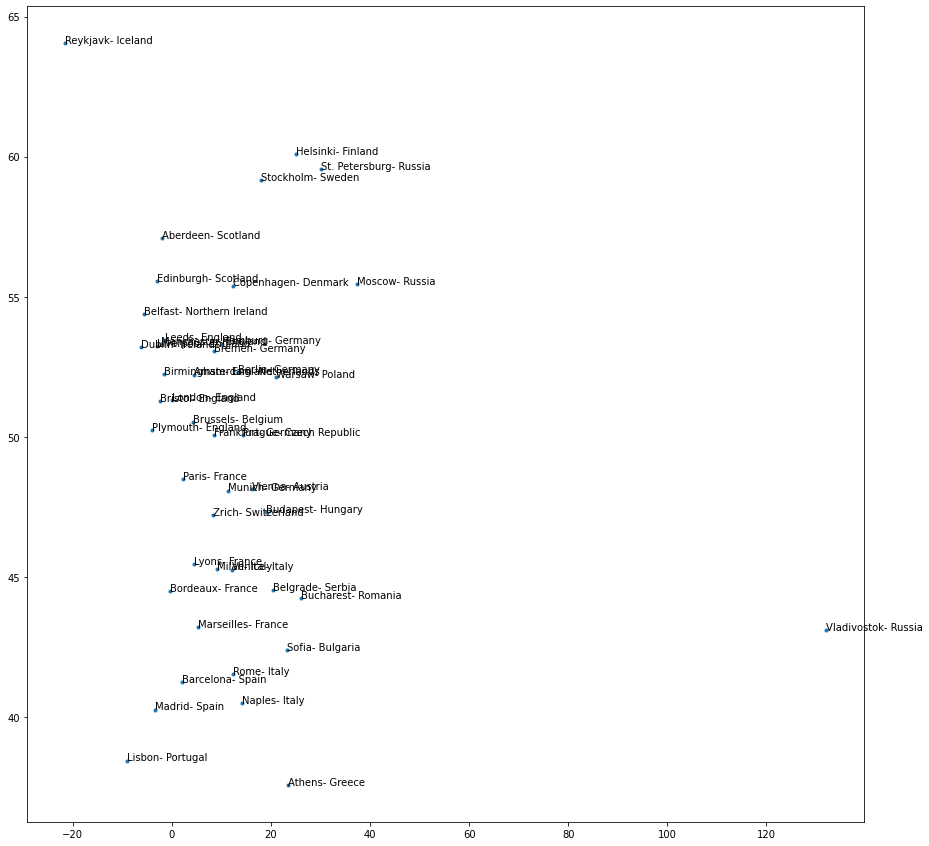

In [5]:
plt.figure(figsize=(15,15))
plt.plot(xs,ys,'.')
for i in range(len(xs)):
    plt.text(xs[i],ys[i],cities[i])

### Subconjunto de ciudades

In [6]:
Nciudades = 15
seleccion = np.random.choice(df.index.to_numpy(),Nciudades,replace=False)

In [7]:
seleccion

array([ 7, 37, 24, 11,  3, 17, 20, 40, 26, 12, 30,  9, 38, 43, 18])

In [8]:
dfSel = df.loc[seleccion]
dfSel

Ciudad  ID  Latitud  Longitud
7      Birmingham- England   8    52.25     -1.55
37  St. Petersburg- Russia  39    59.56     30.18
24           Lyons- France  26    45.45      4.50
11       Brussels- Belgium  12    50.52      4.22
3         Barcelona- Spain   4    41.23      2.09
17      Frankfurt- Germany  18    50.07      8.41
20          Leeds- England  22    53.45     -1.30
40           Venice- Italy  42    45.26     12.20
26     Manchester- England  28    53.30     -2.15
12      Bucharest- Romania  13    44.25     26.07
30         Munich- Germany  32    48.08     11.35
9          Bremen- Germany  10    53.05      8.49
38         Sofia- Bulgaria  40    42.40     23.20
43          Warsaw- Poland  45    52.14     21.00
18        Hamburg- Germany  19    53.33     10.02

In [9]:
xs=dfSel.values[:,3]
ys=dfSel.values[:,2]
cities=dfSel.values[:,0]
locations = list(zip(xs, ys, cities))
len(locations)

15

In [10]:
dfSel.loc[np.random.choice(seleccion)]

Ciudad      Barcelona- Spain
ID                         4
Latitud                41.23
Longitud                2.09
Name: 3, dtype: object

In [11]:
locations

[(-1.55, 52.25, 'Birmingham- England'),
 (30.18, 59.56, 'St. Petersburg- Russia'),
 (4.5, 45.45, 'Lyons- France'),
 (4.22, 50.52, 'Brussels- Belgium'),
 (2.09, 41.23, 'Barcelona- Spain'),
 (8.41, 50.07, 'Frankfurt- Germany'),
 (-1.3, 53.45, 'Leeds- England'),
 (12.2, 45.26, 'Venice- Italy'),
 (-2.15, 53.3, 'Manchester- England'),
 (26.07, 44.25, 'Bucharest- Romania'),
 (11.35, 48.08, 'Munich- Germany'),
 (8.49, 53.05, 'Bremen- Germany'),
 (23.2, 42.4, 'Sofia- Bulgaria'),
 (21.0, 52.14, 'Warsaw- Poland'),
 (10.02, 53.33, 'Hamburg- Germany')]

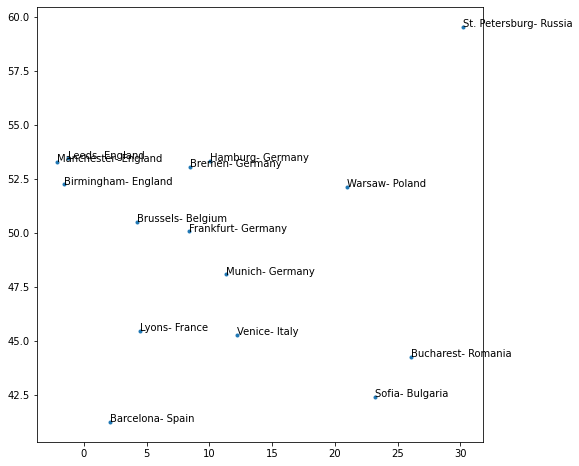

In [12]:
plt.figure(figsize=(8,8))
plt.plot(xs,ys,'.')
for i in range(len(xs)):
    plt.text(xs[i],ys[i],cities[i])

In [13]:
def euclid(p1,p2):
    x1,y1 = p1
    x2,y2 = p2
    dist = np.sqrt((x1-x2)**2+(y1-y2)**2)
    return dist

def fitness_func(solution, solution_idx):
    
    total_length = 0
    
    solAppend = list(solution.copy())
    solAppend.append(solution[0])
    
    for ii in range(len(solution)):
        cityStartIndex = solAppend[ii]
        cityEndIndex = solAppend[ii+1]
        
        cityStartX = dfSel.loc[cityStartIndex,'Latitud']
        cityStartY = dfSel.loc[cityStartIndex,'Longitud']
        pStart = (cityStartX,cityStartY)
        
        cityEndX = dfSel.loc[cityEndIndex,'Latitud']
        cityEndY = dfSel.loc[cityEndIndex,'Longitud']
        pEnd = (cityEndX,cityEndY)
        
        dist = euclid(pStart,pEnd)
        
        total_length += dist
        
    return total_length*-1 #fitness

### Parámetros

In [14]:
sol_per_pop = Nciudades*3 # Number of solutions in the population.
sol_per_pop

45

In [15]:
def on_generation(ga):
    print("Generation", ga.generations_completed)
    print(ga.population)

### Población inicial

In [16]:
population_list=[]
gene_space = seleccion
for i in range(sol_per_pop):
    nxm_random_num = list(np.random.permutation(gene_space))
    population_list.append(nxm_random_num)

In [17]:
population_list

[[7, 24, 26, 9, 30, 20, 40, 17, 11, 18, 12, 38, 3, 37, 43],
 [7, 3, 9, 26, 17, 20, 37, 43, 40, 24, 18, 38, 11, 30, 12],
 [12, 37, 20, 11, 9, 18, 7, 43, 30, 3, 17, 26, 40, 24, 38],
 [37, 40, 12, 17, 7, 3, 20, 11, 18, 9, 24, 26, 38, 43, 30],
 [43, 40, 18, 38, 26, 37, 30, 9, 7, 20, 24, 17, 12, 11, 3],
 [38, 11, 3, 43, 40, 26, 7, 9, 24, 30, 18, 20, 12, 37, 17],
 [18, 3, 7, 38, 12, 9, 11, 17, 40, 43, 26, 24, 30, 37, 20],
 [3, 12, 17, 38, 43, 26, 7, 40, 9, 11, 20, 37, 18, 30, 24],
 [20, 26, 24, 43, 30, 17, 38, 12, 3, 9, 37, 7, 40, 18, 11],
 [18, 24, 30, 26, 40, 11, 12, 43, 9, 17, 3, 20, 38, 37, 7],
 [40, 20, 43, 38, 18, 17, 26, 30, 9, 37, 11, 24, 3, 7, 12],
 [11, 37, 24, 30, 9, 18, 40, 38, 43, 12, 7, 20, 3, 26, 17],
 [24, 7, 30, 37, 3, 26, 18, 20, 43, 40, 9, 17, 11, 12, 38],
 [37, 18, 24, 43, 40, 17, 3, 26, 30, 20, 7, 38, 12, 9, 11],
 [11, 7, 38, 17, 26, 37, 30, 9, 3, 24, 43, 20, 18, 12, 40],
 [9, 40, 38, 18, 11, 7, 26, 12, 43, 3, 24, 37, 30, 20, 17],
 [3, 17, 30, 43, 37, 9, 11, 40, 12, 38, 

### Testeamos la función _fitness_

In [18]:
pob_random = population_list[np.random.choice(len(population_list))]
pob_random

[3, 11, 17, 20, 18, 12, 24, 30, 26, 43, 9, 40, 38, 7, 37]

In [19]:
fitness_func(pob_random,9)

-245.65953326440098

In [20]:
dfSel

Ciudad  ID  Latitud  Longitud
7      Birmingham- England   8    52.25     -1.55
37  St. Petersburg- Russia  39    59.56     30.18
24           Lyons- France  26    45.45      4.50
11       Brussels- Belgium  12    50.52      4.22
3         Barcelona- Spain   4    41.23      2.09
17      Frankfurt- Germany  18    50.07      8.41
20          Leeds- England  22    53.45     -1.30
40           Venice- Italy  42    45.26     12.20
26     Manchester- England  28    53.30     -2.15
12      Bucharest- Romania  13    44.25     26.07
30         Munich- Germany  32    48.08     11.35
9          Bremen- Germany  10    53.05      8.49
38         Sofia- Bulgaria  40    42.40     23.20
43          Warsaw- Poland  45    52.14     21.00
18        Hamburg- Germany  19    53.33     10.02

### Definición del GA

In [21]:
import pygad

In [22]:
[list(seleccion) for _ in range(2)]

[[7, 37, 24, 11, 3, 17, 20, 40, 26, 12, 30, 9, 38, 43, 18],
 [7, 37, 24, 11, 3, 17, 20, 40, 26, 12, 30, 9, 38, 43, 18]]

https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#prevent-duplicates-in-gene-values

In [23]:
ga_instance = pygad.GA(num_generations=100,
                       sol_per_pop=sol_per_pop,
                       num_genes=Nciudades,
                       mutation_num_genes=Nciudades-1,
                       initial_population=population_list,
                       #random_mutation_min_val=min(dfSel.index.to_numpy()),
                       #random_mutation_max_val=max(dfSel.index.to_numpy()),
                       num_parents_mating=2,
                       fitness_func=fitness_func,
                       #gene_space = gene_space, 
                       parent_selection_type="rank",
                       gene_type=int,
                       gene_space=[list(seleccion) for _ in range(Nciudades)],
                       on_generation=on_generation,
                       #mutation_type="swap",
                       #mutation_percent_genes=10,
                       allow_duplicate_genes=False,
                       save_solutions=True)

/home/carlos/.local/lib/python3.8/site-packages/pygad/pygad.py:795: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  if not self.suppress_warnings: warnings.warn("Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.")


In [24]:
ga_instance.run()

Generation 1
[[40 30 17 18  7 26 37 12 38 43 20 11  3  9 24]
 [ 3 17 30 43 37  9 11 40 12 38 26 20 24 18  7]
 [30 11 12  7 43 38  3 26 17 40 37 20 24  9 18]
 [ 9 30 18  3 37 11  7 26 17 12 38 40 43 20 24]
 [ 7 26 43 12 37 11 38  3 17 24 30 40  9 18 20]
 [40 24 38 18 43 12  9 20 11 30 26  3  7 37 17]
 [ 3 26 12 18 24 38  9 40 43 11 17 20 37 30  7]
 [12  9 30 26  7 18  3 17 38 43 40 11 20 37 24]
 [43 26 24 37 12  7 11  3 18 38 30 17 20 40  9]
 [ 7 11 38  3 43 20 17 40 12 26  9 18 24 37 30]
 [17 20 24 26 11  3 37 12 38  7 40 30 18 43  9]
 [38 24 11 30 20  9 43 12  3 26 37 40  7 18 17]
 [18 30 17  9 37 40 12  3 11 38 26 43 24 20  7]
 [ 3 26 40 17 24 37 18  7 38 43 20 11 30 12  9]
 [ 7 30 38 12 37 43 17  3 24 26  9 20 18 11 40]
 [11 37 30 18 17  9 20 38  7 12  3 26 24 43 40]
 [17 40 30 43 18 12 38  7  9 11 26  3 20 24 37]
 [ 9 26  3 43 18  7 40 11 37 38 17 20 24 12 30]
 [30 17 40 38 37 24 20  3 26 18 12 11  9 43  7]
 [18 37 30 43 17  3 24 20 38 40 11 12 26  9  7]
 [ 3 18 26 30  7 43 11 17 3

Generation 6
[[ 7 18 30 17 38 12 37 43  3 26 20 11 24  9 40]
 [26  7 18 30 12 38 37 43  3 17 20 11 40 24  9]
 [37 43 40  3 18 11  7 30 17 20 26 12 38 24  9]
 [ 7 30 11  9 40 38 17 26  3 18 12 37 24 20 43]
 [26 30  9 17  7 38 43 37  3 18 20 24 40 11 12]
 [18  7 38 12 24 43 37 20  3 17 30 11 26 40  9]
 [20 30 17 26  9 12 37 11  7 18  3 43 40 24 38]
 [17 40  7 20 24 37 12 38  3 18 26 11 43  9 30]
 [43 17 11 40 12 24 37 26 30 18 20  3  7 38  9]
 [40  9  3 30 12  7 11 37 26 18 20 43 24 38 17]
 [24 18 38  9 26  3 43 11 12 37 20 40  7 30 17]
 [ 7 26 18 43  3 24 12 30 37 20 40 17  9 38 11]
 [26 30 18 17 38  9 37 43 24 40 20 11  7  3 12]
 [30 20 18 38 26 40 37 43  3 12 11 24  7  9 17]
 [18 30  7 37 38 12 17 43 26 20  3 11 40 24  9]
 [43  3 37 30 20 12 11 38 17  7 26 18 24  9 40]
 [ 3 11 38 26 30 12 37 43  7 24 17 40 18 20  9]
 [12 17 40 30 26  3 37 43 38  7 20 11 24  9 18]
 [38 24 11  7  3 18 43 37 40 26 20 30 12  9 17]
 [20 40 26 24 30 18 12 37  3 17 38 11 43  9  7]
 [ 7  9 20 40 12 11 43 17  

Generation 11
[[11 24 40 30 43 12 37 38 17 18  7 20 26  3  9]
 [ 7 18 30 17 38 12 37 43  3 26 20 11 24  9 40]
 [26 40 11 17 20 37 12 43 18 30 38  3  7  9 24]
 [17  3 30 40 12 20  9 37 18  7 43 38 26 11 24]
 [38 12 24  9 17 30 11 37 43 18  7 40  3 26 20]
 [43 18 30 40 38 12  9  7  3 26 20 24 11 37 17]
 [43 40  7 24 20 17 26 30  3 37 11 38 18 12  9]
 [24 12 26 40 38 17  3 37 43 18 30 11 20  9  7]
 [20 11 38 40 30 12 37 43  3  9  7 24 18 26 17]
 [12 30 20 18 11 26 17 40  3  9 43 37  7 24 38]
 [37 24 40 30 38 11 26 43 17 18  7 20 12  3  9]
 [37 18 30 12 40 26  7 43 11 17  3 20 38 24  9]
 [ 7 30 43 20 38 12 37 24  3 18 17 40 11  9 26]
 [37  3 20 26 30 12 11 43 18 24  7 17 38  9 40]
 [37 24 38 17 30 12 18 26  3  7 11 20 43  9 40]
 [11 37 18 30 24 40 17 38  7 26 20 12 43  3  9]
 [11  9 17 40  3 18 37 38  7 20 30 43 24 26 12]
 [26 30 12 24 38 18 43  9  3 11 40 17 37 20  7]
 [20 12  9 17  3 26 38 43 40 24  7 11 30 37 18]
 [18 12 37 24 38  7  3 43 30 26 17 11 20 40  9]
 [43 17 26 12 30 11 37  7 

Generation 17
[[11 24 40 30 43 12 37 38 17 18  7 20 26  3  9]
 [40 11 30 18 43 12 38 37  3 26 20  7 24 17  9]
 [26  3 18 11 17  9 20 38 24 40  7 37 43 30 12]
 [ 7 20 37 18 24 38 17 30 40 12  3 11 26  9 43]
 [20 43 38 37 24 26 11 40 17 18 30  7  3 12  9]
 [20  3 30 12 43 17 40 37 26 24  7 38 11 18  9]
 [43 17 30 18 11  3  9 24 12 26 37  7 40 20 38]
 [ 3 11 37 18 30 12 17 38  9  7 40 20 43 26 24]
 [24 30 40 18 43 38  9 20  3 17 37  7 11 26 12]
 [18  3  9 40 20 24 38 37 11 17  7 43 30 12 26]
 [40 11 24 30 43 37 17 12  3 18 20  7 26 38  9]
 [24 30 18 43 37 20 12  7 40 26 38 17 11  3  9]
 [26 38  9 30  3 12 11 24 17 18  7 20 40 37 43]
 [43 12  9 38 40 26 37 30 17 18  7 20 24  3 11]
 [ 7 30 40  9 11 26 20  3 43 12 38 37 24 17 18]
 [ 9 20 37 43 38 12 30  7 18 26 17 24 11  3 40]
 [37 18 17 26 43 24 11 38 40 12 20  7  3 30  9]
 [38 20  3 12  9 43 17 37 11 40 24  7 26 30 18]
 [12 30  9 18 43 17 38 40 26  3 11  7 24 20 37]
 [20  9 38 30 26 40 43  3 17 18 11 12  7 37 24]
 [38 11 12 37 24 30 40  9 

Generation 23
[[ 7  9 18 17 43 12 37 38 30 40 24 26 20  3 11]
 [11 24 40 30 43 12 37 38 17 18  7 20 26  3  9]
 [37 30 38 17 43  9  7 18 12 11 24 20  3 26 40]
 [40  3 20 12 26 24 17 38  9  7 37 11 43 30 18]
 [12 30 11  7 18 37 40 38  9 43 24 20 26  3 17]
 [11 20  7 12 43 17 24 26 30 18  9 38 37 40  3]
 [18 37  9 20 24 17 38 40  3 43 11 30 26 12  7]
 [12  9 24 18 30  7 40  3 43 38 17 26 37 20 11]
 [20 18  7 40 12  9 43 11 37 17 24 30 26  3 38]
 [12 11 38 30 20 43 24  3 18  7 17 26 37 40  9]
 [17 11  3 18 43 12 37 38 30 24 40  9 26 20  7]
 [20 12 38 43 18 17 26 40 37 24 30  3 11  7  9]
 [ 9 18 26 20 43 12 37 30 11 38  7 17 40  3 24]
 [11 20 18 24 17 37  3 38  7 40 26 12 43 30  9]
 [12  9 38 40 43 26 37 18 11  7 24 20 17  3 30]
 [ 7 18 37 12 40 43 24 38  9 11 30 20 26  3 17]
 [24 37 18 38 43 40  7  9  3 17 12 20 26 30 11]
 [24 38 40 26 17 12 43  9  3  7 18 11 20 30 37]
 [ 3 18 37 17 40 12 11 24 30 43 38  7 26 20  9]
 [43 26 24  7 37 11 18 38 17 12  3 40 20 30  9]
 [ 7 12 40 30 26  9 37 38 

Generation 28
[[24 18  9 17 37 43 12 38 30 11  7 20 26  3 40]
 [ 7  9 18 17 43 12 37 38 30 40 24 26 20  3 11]
 [38 12 26  3 24 43 18 37 30 17 40  9 20  7 11]
 [30 12 18 17 24  9 37 20 38 40 26 43  7  3 11]
 [ 9 18 30 38 20 17  3 43 11 24  7 26 37 40 12]
 [43 18 40 17  7 37 20 38 26 11 24 12 30  3  9]
 [30  9 26 38 37  7 12  3 24 11 43 40 20 17 18]
 [ 9 12 18 37 26 43 17 24  7  3 38 20 30 11 40]
 [11 17  7 18 37  9 12  3 38 24 43 20 40 26 30]
 [26  3 18  9 20 37 24 30 17 40  7 43 12 38 11]
 [24  7 18 11 26 30 12 38 43 37 40 20 17  3  9]
 [12 11 18 37 43  7 40 38 24 20 30 17  9  3 26]
 [40 24 20  7 37 43 17 12 30 11 18 26  9  3 38]
 [18 43 11 17  3 37 40 20  9 26 24 12 38  7 30]
 [ 3 20 38 17 12 43 24 11 26 30 40  9 18 37  7]
 [40 20 37 26 12  9 24 18 30 11 17 38  7  3 43]
 [43  7 20  3  9 11 12 30 38 37 18 26 24 17 40]
 [20 40 24 17 18 30 37 38 12 11  9  7 26  3 43]
 [ 7  3 12 20 11 18 37 38  9 40 24 26 17 30 43]
 [24 38  7  9 26 37 20 11 40 17 30 12 43  3 18]
 [38 40  9 24 37 43 18  7 

Generation 34
[[24 18  9 17 37 43 12 38 30 11  7 20 26  3 40]
 [ 7  9 18 17 43 12 37 38 30 40 24 26 20  3 11]
 [26 20 17 11 40 30 12 38 43  9  7 18 24  3 37]
 [11 30 24 18  7 12  3 37 40 17 38 20 26 43  9]
 [37  7 11 17 26 43  9 30 38  3 18 20 24 40 12]
 [20 11 26 17 37 38 24 43 30 18 12  7  9  3 40]
 [30 26 18 17 37 20  9 40 24  3 38 12 43  7 11]
 [ 3 40 18 17  9 20 26 30 38 12 24 37 43  7 11]
 [24 43 17 26  9 40 37 30 11  7 12 18 20 38  3]
 [18 30  3 40 12 43  7 38  9 24 37 20 26 11 17]
 [26 18 37 30  7 43 11 24 17 12 40 38 20  3  9]
 [20 12  7 43 38 26  9  3 30 11 18 24 40 37 17]
 [17 30 11 18 38  3 37  7 12 40  9 26 20 24 43]
 [26 30 37 12 24 40  3 38 43 11  9 20 18  7 17]
 [11 38 18 17 43 12 26  7 37 40  9 24 20 30  3]
 [38 24 18 43 17 12  7 20 30 11 37  9 26  3 40]
 [26 37 20 30 18 11  3 38 17 40  7  9 43 12 24]
 [ 9 43 11 26 17  7 12 20 38 18 30 24 37 40  3]
 [11 37 26  9 18  3 40 38 30 43  7 17 20 12 24]
 [ 3 18 17  9 20 37 26 40 12 11 24 43 30  7 38]
 [11 18 20 24 37  9 12 38 

Generation 40
[[24 18  9 17 37 43 12 38 30 11  7 20 26  3 40]
 [ 7  9 18 17 43 12 37 38 30 40 24 26 20  3 11]
 [26 20  9 18  3 12 37 38 30 40  7 24 17 11 43]
 [ 3 18 17  9 11 38 37 12 24 43 30 20 26  7 40]
 [37  7  9 38 43  3 20 17 12 40 26 24 30 18 11]
 [43  7  3 38 40 30 12 17  9 11 24 20 26 18 37]
 [ 3 11 43 24 20  9 30 38 37 40 18 26 17  7 12]
 [38 37 12 17 11 26 40  7  9 18 24  3 43 20 30]
 [ 9  7 30 18 17 20 38  3 24 40 43 12 26 37 11]
 [18 40 26 12 20 43  9 17 30  7 11 37 24  3 38]
 [ 9 11 17 38  7 30  3 20 26 18 37 24 43 12 40]
 [30 38 11 17  3 12 26  7  9 40 24 37 20 43 18]
 [11  9 24 17 40 26 30 38 12 43 18 37 20  3  7]
 [11  7 17 43 24 26 12  3 30 38 37 20  9 18 40]
 [17 11 24 38  3 18 30 12  7  9 20 26 40 37 43]
 [24  7 38 20 12 30  3 18 26 40  9 43 17 37 11]
 [20 17  9  3 12 24 43 30 38 40  7 26 11 18 37]
 [37  9 43 11  7 12 17 24 30 18 38 20 26  3 40]
 [ 9 18 37 20 30  7 17 38 24 12 43 26 40  3 11]
 [43 37  9 17 18  7 12 38 30  3 26 40 24 11 20]
 [17 40 24 12 43  9 20 38 

Generation 46
[[24 18  9 17 37 43 12 38 30 11  7 20 26  3 40]
 [ 7  9 18 17 43 12 37 38 30 40 24 26 20  3 11]
 [40 30  9 37  3 43 20 38 18 11  7 12 24 17 26]
 [24 40  9  7 43 37 12 38 30 11 17 20 26  3 18]
 [20 37  9 26 30 24  3 17 18 40 12 38 43  7 11]
 [30 40 26 17 24  3  7 12  9 11 43 20 38 18 37]
 [30 18  3 43 37  7 17 12 38 11 24 26 40  9 20]
 [12 43 40  3 37 18 17 30 20 24  7 11 26 38  9]
 [12 37 40 17  3 43 24 38 20 11  7 26 30 18  9]
 [26 37  7 24 43 17  9 20 30 18 12  3 38 40 11]
 [24 30  7 20 40 17 43 38  3 18 11 26 12 37  9]
 [37  7 38 17 40 18 30 26 20 43  9 24 12  3 11]
 [17 11  9 18 12 40 30 38 37 24  7 26 20 43  3]
 [11 37 20 24 18 17 12 38 30  3 40 43 26  7  9]
 [12 11 26 30  9  3 37 38 17 43 24  7 20 18 40]
 [20 11 24 38 37  3  9 43 18 30 12  7 26 17 40]
 [43 24 11 40 37 18 12 38 20  9 30 26 17  3  7]
 [20 17 18 26 40 12 24 11 30 43  3 38  7 37  9]
 [18 30 17 20 43  7  9 38 24 40 37 12 26  3 11]
 [18 37 40 20 43 12 17 38 30 11 24 26  3  7  9]
 [ 7 26  3 17 18 43 12 30 

Generation 52
[[24 18  9 17 37 43 12 38 30 11  7 20 26  3 40]
 [ 3 26  9 17 37 43 12 38 30 11  7 20 18 40 24]
 [43 40 26  9  7 17 18 38 30 11 37 20 24 12  3]
 [18 40 11 26 37 20 12 38 30  9 17 43  7 24  3]
 [26 11 40 17 37 43 12 24 30 18 20  3  9 38  7]
 [11 24  3 40 20 43 12 38 30 17 26 18 37  7  9]
 [26 18 38  7 20 30 40  9 43 11 17 24  3 12 37]
 [ 3 26 18  7 37 30 20 43 12 11 17 38 24  9 40]
 [26  9 18 17 11 43 40 20 24  7 37 38  3 12 30]
 [30 20 26 17 12 11 38 37  3 24  7  9 40 18 43]
 [ 3 38 12 17  9 43 37 24 11 30  7 26 20 40 18]
 [26  9 20 11 40  3 12 38 30 24  7 43 17 18 37]
 [17 38  7 12 11 43 24  9 20 40 26 30 18 37  3]
 [ 7 26  9 38 37 24 12 17 43 18  3 30 11 40 20]
 [ 3 40 24 17 37 18 38 26 30 11 20  7  9 43 12]
 [43 26 11  3 37  9 24 38 17 30 20  7 40 12 18]
 [12 18 37 17  9 26 24  3 11 30  7 20 38 40 43]
 [38 11 17 20 37 26  9  3 40 43  7 24 18 12 30]
 [ 9 43 40 17 37 11 12 26 30 18  7 20  3 24 38]
 [30 18 26  9 20 43 11 38  3 12  7 37 40 24 17]
 [20  3 37 17  9 40 43 24 

Generation 57
[[24 18  9 17 37 43 12 38 30 11  7 20 26  3 40]
 [ 3 26  9 17 37 43 12 38 30 11  7 20 18 40 24]
 [37 18 38 24 20 30 12  9 11 43  7 26  3 40 17]
 [ 9 17 12 24 26 43  3 38 20  7 11 37 18 40 30]
 [ 9  7 20 38 11 26 37 40 30 12 18  3 24 17 43]
 [ 7  3 43  9 37 24 26 38 30 11 17 20 18 12 40]
 [40 43  9 12 37 18  7 11 30 38 17 20  3 24 26]
 [20 24 30  3 12 43 37 38  9 40  7 17 18 26 11]
 [ 9 24 17 26 38 43 12 37 30 11  7 20 18 40  3]
 [37 18  9 11  3 12 43 40 30 17  7 20 38 26 24]
 [37  9 11 24 17 43 12 38 30  3 20  7 26 40 18]
 [11 17  7  3 20 43 40 38 18 30 26 12 24  9 37]
 [12  9 18 40 43 30 17 11  3 38  7 20 26 24 37]
 [17  7 20 12 37 43  3 24 30 26 11  9 38 40 18]
 [30  3 12 11 20  9 43 38 40 17  7 37 18 24 26]
 [12 37  9 24 26 38 43  3 30 11 40 20 17 18  7]
 [11 12  9 26 18  7 38 17 43 24 30 20 40 37  3]
 [ 9 43  3 11 17 18 30 38 24 37 12 20  7 26 40]
 [37 26 11  9 12 40  3 38 30 43  7 20 18 17 24]
 [26 38  3 17 37 24 12  9 30 11 43 20  7 18 40]
 [37  3 26 43 12 18 24 17 

Generation 63
[[24 18  9 17 37 43 12 38 30 11  7 20 26  3 40]
 [ 3 26  9 17 37 43 12 38 30 11  7 20 18 40 24]
 [20 30 40 43 38 12 17 24 18 11  7 26 37  9  3]
 [38 11  7 20 37 43  9  3 30 12 18 17 26 24 40]
 [18 12 17  9 37 43 24 38 30 11 40  7 26 20  3]
 [12 30 38  3 20 43 17 40 24 11  7 37 18 26  9]
 [43  3 26 11 20 24  7 17 12 38 30 37  9 40 18]
 [38 11 43 17 37  9 24 12  7 26 30 40 18  3 20]
 [ 3 24 20 37 40 43 18  9 38 30  7 11 12 17 26]
 [26  7 43  3 24 38  9 12 30 18 17 20 11 37 40]
 [43 11  9  7 37 38 24 20 26 18 12  3 30 40 17]
 [26 43  9  7  3 37 12 30 17 11 38 20 18 24 40]
 [ 9 18  3 17 20 43 11 38 37 12 30  7 26 40 24]
 [ 7 17 38 20 24  3 12  9 30 11 40 26 37 43 18]
 [18 37 43 11  7  9 38  3 24 17 30 20 12 40 26]
 [ 9 40 43 17 38 18 30 37 26 20  7 11 24  3 12]
 [12 17 18 37 11  7 40 43 24 26 38 20  3 30  9]
 [38 12 37 30 43  9 24  3 11 18 20  7 40 26 17]
 [24 18 37  7 40 17  3 38 30 11 43 12 26  9 20]
 [18 40  3 30 12 43 11 37 17 38  7 26 24  9 20]
 [ 9  3 18 20 17 24  7 26 

Generation 68
[[24 18  9 17 37 43 12 38 30 11  7 20 26  3 40]
 [ 3 26  9 17 37 43 12 38 30 11  7 20 18 40 24]
 [ 3 43 26 24 17 18 12 11 30 38  9 20  7 40 37]
 [ 9  7 20 18 11 12 43 38 37 24 26  3 40 17 30]
 [24 26  7 18 11 12 30 38 43 20  9 37 17 40  3]
 [12 38 30 40 37 20  3 43 17  7 11 26  9 24 18]
 [18 38  3 17 30 11 12 40 37 43  7 20 26  9 24]
 [11 26 12 37 20 43 17 30 38  3 24  9 18  7 40]
 [26  9  3 17 37 43  7 38 30 11 12 40 18 24 20]
 [30 11 20  9 37 43  3 38 24 18  7 17 40 12 26]
 [37  7 26 17  3  9 12 38 30 11 43 18 20 40 24]
 [37 18  7 17  9 20 12 38 30 26  3 43 11 40 24]
 [43 18 24 17  9 11 12 38 30 37  7 20 26  3 40]
 [30 24 26 17 37 43  9 20 18 11  7 40 12  3 38]
 [38 18 24 17 43 30 11 26  9  3 40 20 37  7 12]
 [11 20  9 40 30 24 12 17 37  3  7 26 43 38 18]
 [26  9 40 17 37 20 12 24 11 30  7 43  3 18 38]
 [11 40 12 37 43 17 20 18 30  3  7  9 26 24 38]
 [40 11 37 26  9 43 17 12 24 20  7 18  3 30 38]
 [30 20 43 38 18 17 40 11  3 37 26  9 24  7 12]
 [37 18 24  3  9 20 40 38 

Generation 74
[[24 18  9 17 37 43 12 38 30 11  7 20 26  3 40]
 [ 3 26  9 17 37 43 12 38 30 11  7 20 18 40 24]
 [11 17  3  7 20 43 24 26 30  9 38 12 18 37 40]
 [38 26 43 40 12  9 37 20 30 11  7 17 24 18  3]
 [ 3 24 26 12  7 43 17 40 30 11 18 20  9 38 37]
 [ 7 17 37 24  9 11 12 38 30 43  3 20 18 40 26]
 [ 3 24 20 26 11  9 12 38 30 18 40 37 17  7 43]
 [20  3 17 11 12 43 38 37 30  7  9 26 18 24 40]
 [ 3 43 24 26 37 17  9 38 30 11 18 20  7 40 12]
 [12  3 18  7 11  9 20 30 38 43 17 26 37 24 40]
 [ 9 37  7 40 26 43 20 18 30 11  3 17 38 12 24]
 [ 9 40 17 38 20 43 26  3 18 11  7 30 12 24 37]
 [ 7 38 11 17 37 18 30 43 12  9 26  3 20 40 24]
 [38 17 37 26  9 18  7 30 43 11 24 20 12  3 40]
 [37 40 30 12 43  9 17 38  3 11 24 18 26 20  7]
 [20 11 17 40 18 43 30 38 24 12  7  3 26 37  9]
 [38 12 40 17  7 30 20 24 43 11 37 18  3  9 26]
 [17 43 24 18  9 12 20 11 30 40  7 26 37  3 38]
 [24 12 40  3  7 43 11 26 30 17 37 38 18  9 20]
 [30 37  9 26 38 43 12 40 24 11  7 20 17  3 18]
 [43 11  9 26  7 24 12 20 

Generation 80
[[24 18  9 17 37 43 12 38 30 11  7 20 26  3 40]
 [ 7 26  3 24 37 43 12 38 30 11 17 18  9 40 20]
 [11 17  9 20 37 40  3 38 18 24  7 30 26 43 12]
 [26 40 30  9 18 24 43 38  3 11 17 20  7 37 12]
 [12 17 18 43  9 37  3 38 26 11 30 24  7 40 20]
 [ 9 18 24 37 20 43 12 30  7 17 11  3 38 26 40]
 [30 37 43 38  9 18 24 17 26 40  3 20 11 12  7]
 [ 3 11 18 24  7 43  9 38 30 26 17 37 12 20 40]
 [20 30 37  7 26 18 24 38  3 11 40 43  9 12 17]
 [43  9 40 24 26 17 12 38 30 11 20  7 18 37  3]
 [ 9  3 12 38 37 43 24 26 30 11  7 17 18 40 20]
 [20 43  7 40 17 26 24 38 30 11 18  3 37 12  9]
 [40 43 17  9 20 18 12 38 30 24 26 37  3 11  7]
 [18 20 26 17 37 24 40 30  7 11 38 12  9 43  3]
 [ 7 18 26 40 17  3 12 43 30 11 37  9 24 38 20]
 [37 40  3 26  7 43 11 12 24 38 18 20 17  9 30]
 [24 38 12 18 11 43 30 17 26  7  9 37  3 20 40]
 [38  7  9 43 24 17 12 26 30 18  3 11 37 20 40]
 [43  7 12 17 37 24 26 38 30  9 11  3 18 40 20]
 [43 24  7 20 37 26 12  3 30 11 17 18 38  9 40]
 [ 7 26 38 24 37 17  3 12 

Generation 85
[[24 18  9 17 37 43 12 38 30 11  7 20 26  3 40]
 [ 7 26  3 24 37 43 12 38 30 11 17 18  9 40 20]
 [ 7 24  9 26 18 11 37 38 30 43 12 40 17 20  3]
 [18 26 12 37 43 38 40 24 30 11 17 20  7  9  3]
 [17  9 18 24  3 43  7 40 11 30 26 12 37 38 20]
 [17 12 38 11 37 26 20  7 30  3 18  9 43 24 40]
 [ 3 12 37 17  9 11 40  7 30 43 26 24 38 18 20]
 [40 18 17 24 26  9 20 38 30  7  3 37 11 12 43]
 [20 18 12 30 43  3 11 38 40  9  7 24 26 17 37]
 [12 43 30 17 37 40 18  7  9 20 38 11 24  3 26]
 [ 3 18 37 40  9 43 17 38 30 11  7 20 24 12 26]
 [18 17  3 38 37 12 11 20  9 43  7 24 30 26 40]
 [26 18  7 17 30 43  9 37 38 11 24 20  3 40 12]
 [30 11  9 40 12 37 43 17 26 18 38 20  7  3 24]
 [ 9 17 24 30 11 43 20 40 37 26  3  7 18 38 12]
 [ 3  7 30 17 18 38 12 43 26 11 24 20  9 40 37]
 [18  7 37 26 17 24 11 30 38 12 43  3 20 40  9]
 [43 11  3 24  9 17 12 38 18  7 40 20 30 37 26]
 [17 24  9 12 30  7 11 38 37 18 43 20  3 40 26]
 [17 30  7 26 38 12 40 37 24 11  9 20 18 43  3]
 [26 38  9  3 37 30 12 18 

Generation 91
[[24 18  9 17 37 43 12 38 30 11  7 20 26  3 40]
 [ 7 26  3 24 37 43 12 38 30 11 17 18  9 40 20]
 [30 26 43 40 17  3 20 38 18  7 37 11  9 24 12]
 [ 3 20  7 18 17 43  9 11 12 38 24 26 37 30 40]
 [ 7 24 38  9  3 26 12 17 30 11 18 20 40 37 43]
 [20  9 12 26 37  3 11 38 30 18 24  7 17 43 40]
 [20  7 18 17 30 24 43  9 37 11  3 38 12 40 26]
 [26  9 43 37 40  3 30 38 12 18 17 11 20  7 24]
 [20 37 40 30 12  9 24 38 17 11  7  3 43 26 18]
 [40 24  3 26 17  7  9 38 11 30 12 18 37 43 20]
 [ 7 18 17 11  9 37 30 38 12 40  3 24 20 26 43]
 [11  9 38 24 37 43 12  3 40  7 17 20 26 18 30]
 [ 3 38 17 20 43 11 12 24 30 37 18 26  7 40  9]
 [20  7 11  3 37 43 12 18 40  9 24 26 38 17 30]
 [26 38  3 20 37 43 12  9 30 40 17  7 18 11 24]
 [38 40  7 24 37 26 12 20 30 11  3 43 18 17  9]
 [24  9 11 17  3 30 12 38  7 26 37 43 18 40 20]
 [43 12  7 37 24  3 17 38 30 26 18  9 11 20 40]
 [38 24  9 12 37 40 17 43 26 11  7 20 30 18  3]
 [18 12  9 43 37  3 11 38 24 26 17 20 30  7 40]
 [ 7 38 24  9 12 43 18 37 

Generation 96
[[24 18  9 17 37 43 12 38 30 11  7 20 26  3 40]
 [ 7 26  3 24 37 43 12 38 30 11 17 18  9 40 20]
 [30 43 40 12 17 18 38 37 24 11  9  3 26  7 20]
 [26 24  7 40 43 12 11 38  3 37 30 20  9 18 17]
 [17 18  9 24 26  3 43  7 38 11 30 12 37 40 20]
 [26  3 38 24 12 17  9 20 30 40 43 18 37  7 11]
 [17 26  7 43 38 24 11  3 30 18 12 40 20  9 37]
 [11 30 18 37  3 20 12 43  7 17 24 38 26  9 40]
 [20 38 26 43 24 17 37 18 30  7  3 11 40  9 12]
 [ 7 30 11  9 20 17 24 38 43  3 26 37 18 40 12]
 [17 12  7  9 26 18 30 43 38 24 37  3 40 11 20]
 [20 11  3 12 38 43 17 24 30 40 18  9  7 37 26]
 [ 3 12  9 18 24 37 11 38 30  7 17 26 43 40 20]
 [12 26 24  3 11  9 18 38 30 37 43 20 17  7 40]
 [43  9 18 20 37 38 12 26 30 11 17 24  3 40  7]
 [ 9 37 18 40 26 17 38 12 30 11 24  7 20 43  3]
 [24 20 40 38 37 17 12 26 43  9 11  7 30 18  3]
 [43  9 17 24 11  7 40 38 30 37  3 18 26 12 20]
 [12 30 37 17  9 43 24 38 18 11 40 26  7 20  3]
 [12 18 24 40 38 43 26 37 30 11  7 20  9 17  3]
 [ 7 17 30 37 18 24 12 40 

In [25]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("best_solution: {solution}".format(solution =solution)) 

best_solution: [24 18  9 17 37 43 12 38 30 11  7 20 26  3 40]


In [26]:
print("best_solution fitness: {}".format(solution_fitness))

best_solution fitness: -122.6715665744351


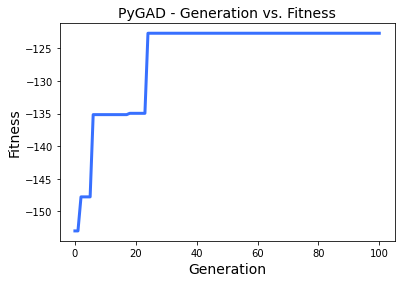

In [27]:
ga_instance.plot_fitness()
plt.close()

In [28]:
ga_instance.population

array([[24, 18,  9, 17, 37, 43, 12, 38, 30, 11,  7, 20, 26,  3, 40],
       [ 7, 26,  3, 24, 37, 43, 12, 38, 30, 11, 17, 18,  9, 40, 20],
       [40,  7,  3, 38, 12, 20, 37, 18, 24, 11, 17, 26,  9, 30, 43],
       [11, 12, 38, 20, 37, 30, 40,  3, 43,  7, 18, 17, 24,  9, 26],
       [20, 18, 37, 38, 26, 43, 17, 24,  3, 30, 11, 40,  9,  7, 12],
       [20,  7, 30, 24, 37, 43, 12, 40,  3, 11, 17, 26, 18,  9, 38],
       [40, 18,  9, 37, 30, 24, 12, 26, 17, 20,  7,  3, 38, 43, 11],
       [11, 17, 24,  7, 37, 18, 12, 38, 30,  9, 40, 20, 26,  3, 43],
       [12, 43, 20, 30, 18, 26, 24, 38, 37, 11, 17, 40,  7,  3,  9],
       [11,  9, 26, 30, 37, 43, 12, 17, 24,  7, 38, 18,  3, 20, 40],
       [40, 24, 26, 11,  9, 12, 43,  3, 20, 18, 38, 17, 37,  7, 30],
       [12, 30, 24,  7, 11, 18,  3, 38, 26, 37, 17, 43, 40,  9, 20],
       [43, 40, 26, 17, 38, 24, 11, 37, 30, 12, 18, 20,  9,  3,  7],
       [ 9, 12, 17, 24, 43,  7, 26, 38, 30,  3, 11, 18, 20, 37, 40],
       [30, 24,  7, 17, 43, 12, 37

### Gráfica de la ruta

In [29]:
solution

array([24, 18,  9, 17, 37, 43, 12, 38, 30, 11,  7, 20, 26,  3, 40])

In [30]:
dfSel

Ciudad  ID  Latitud  Longitud
7      Birmingham- England   8    52.25     -1.55
37  St. Petersburg- Russia  39    59.56     30.18
24           Lyons- France  26    45.45      4.50
11       Brussels- Belgium  12    50.52      4.22
3         Barcelona- Spain   4    41.23      2.09
17      Frankfurt- Germany  18    50.07      8.41
20          Leeds- England  22    53.45     -1.30
40           Venice- Italy  42    45.26     12.20
26     Manchester- England  28    53.30     -2.15
12      Bucharest- Romania  13    44.25     26.07
30         Munich- Germany  32    48.08     11.35
9          Bremen- Germany  10    53.05      8.49
38         Sofia- Bulgaria  40    42.40     23.20
43          Warsaw- Poland  45    52.14     21.00
18        Hamburg- Germany  19    53.33     10.02

In [38]:
xs=[]
ys=[]
cName=[]
for ii,ee in enumerate(solution):
    ciudad = dfSel.loc[ee]
    xs.append(ciudad.Longitud)
    ys.append(ciudad.Latitud)
    cName.append(ciudad.Ciudad)
xs.append(xs[0])
ys.append(ys[0])
cName.append(cName[0])

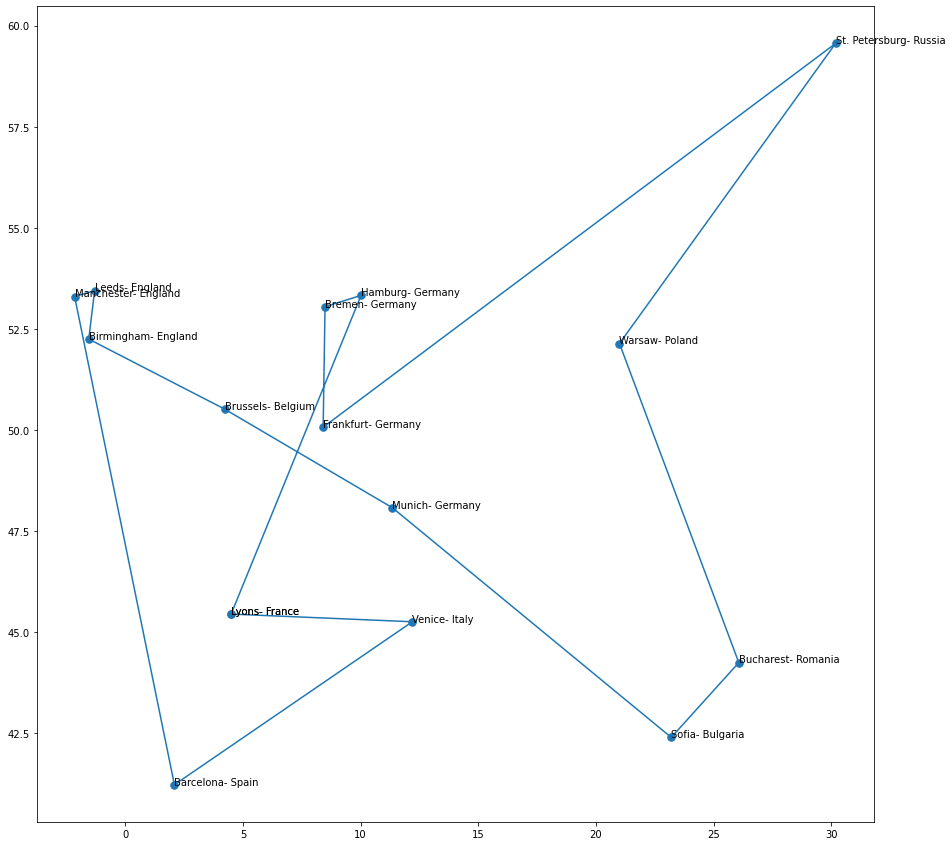

In [39]:
f,ax=plt.subplots(nrows=1,ncols=1,figsize=(15,15))
ax.plot(xs,ys,'.-',markersize=15)
for i in range(len(cName)):
    plt.text(xs[i],ys[i],cName[i])